<a href="https://colab.research.google.com/github/Sangamithra546/DataScienceLabManual231801147/blob/main/6exp231801147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("/content/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
pip install pandas matplotlib seaborn wordcloud scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer
import calendar, re
%matplotlib inline
sns.set(style="whitegrid")

In [7]:
df.shape

(6234, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [10]:
print(df.columns.tolist())
print(df.describe(include='all').T[['count','unique','top']])
df['type'].value_counts()

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
               count unique                                                top
show_id       6234.0    NaN                                                NaN
type            6234      2                                              Movie
title           6234   6172                                        The Silence
director        4265   3301                             Raúl Campos, Jan Suter
cast            5664   5469                                 David Attenborough
country         5758    554                                      United States
date_added      6223   1524                                    January 1, 2020
release_year  6234.0    NaN                                                NaN
rating          6224     14                                              TV-MA
duration        6234    201                                           

,count
type,
Movie,4265
TV Show,1969


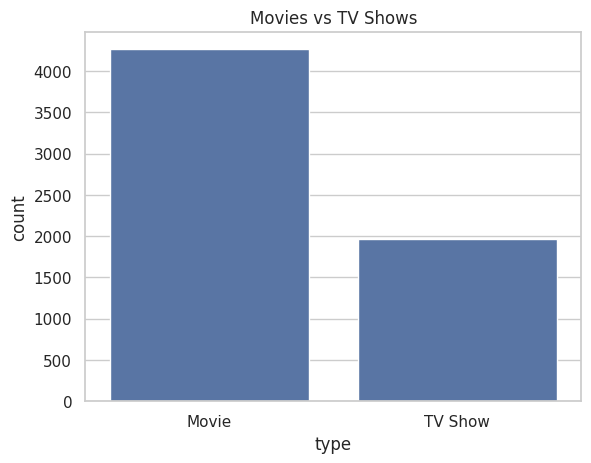

In [11]:
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows')
plt.show()

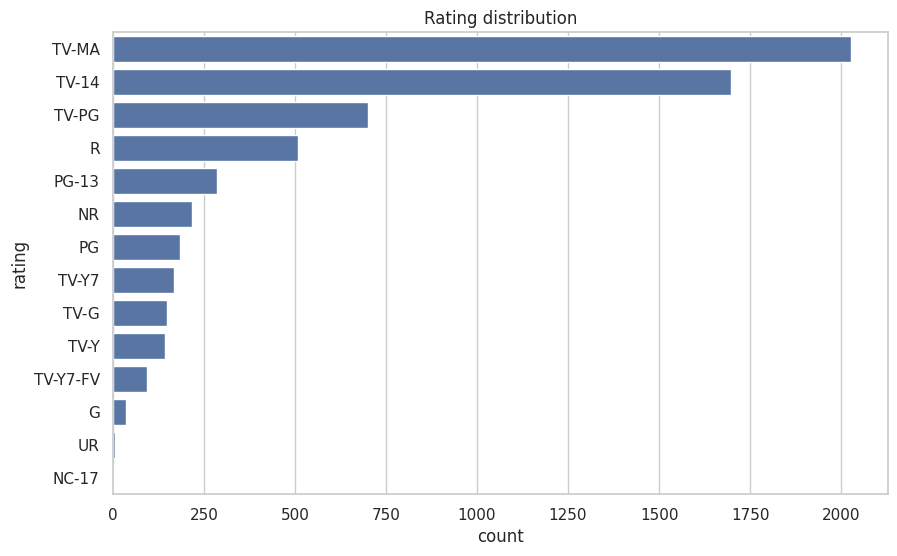

In [12]:
plt.figure(figsize=(10,6))
order = df['rating'].value_counts().index
sns.countplot(data=df, y='rating', order=order)
plt.title('Rating distribution')
plt.show()

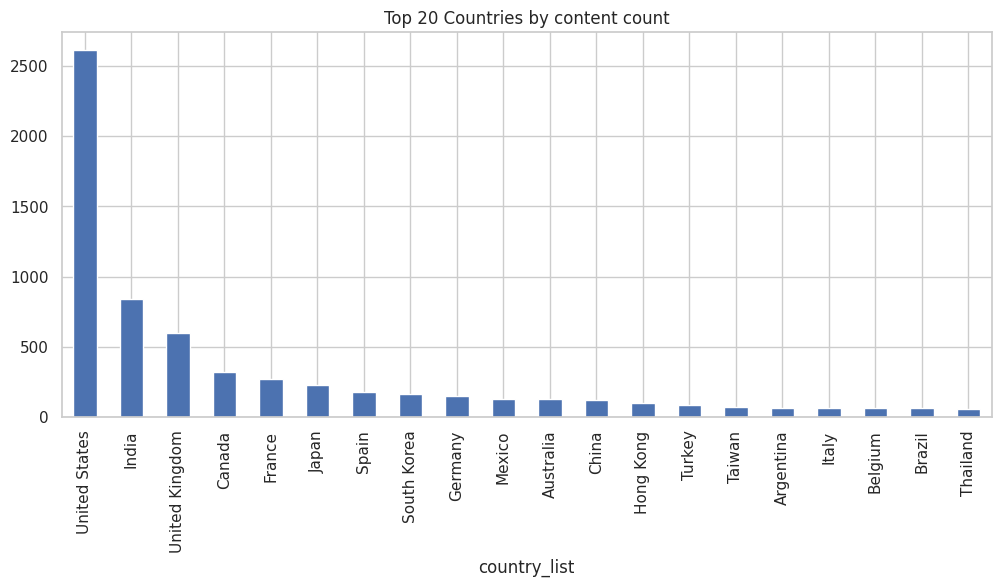

In [16]:
df['country_list'] = df['country'].fillna('').apply(lambda s: [x.strip() for x in s.split(',')] if s else [])
country_counts = df.explode('country_list')['country_list'].value_counts().head(20)
country_counts.plot(kind='bar', figsize=(12,5))
plt.title('Top 20 Countries by content count')
plt.show()

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
added_trend = df.dropna(subset=['date_added']).groupby(df['date_added'].dt.year).size()

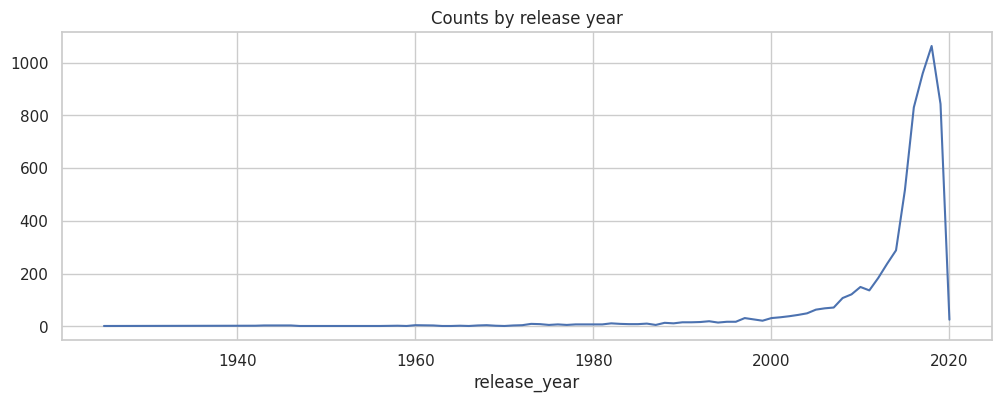

In [17]:
release_trend = df.groupby('release_year').size().sort_index()
release_trend.plot(figsize=(12,4))
plt.title('Counts by release year')
plt.show()

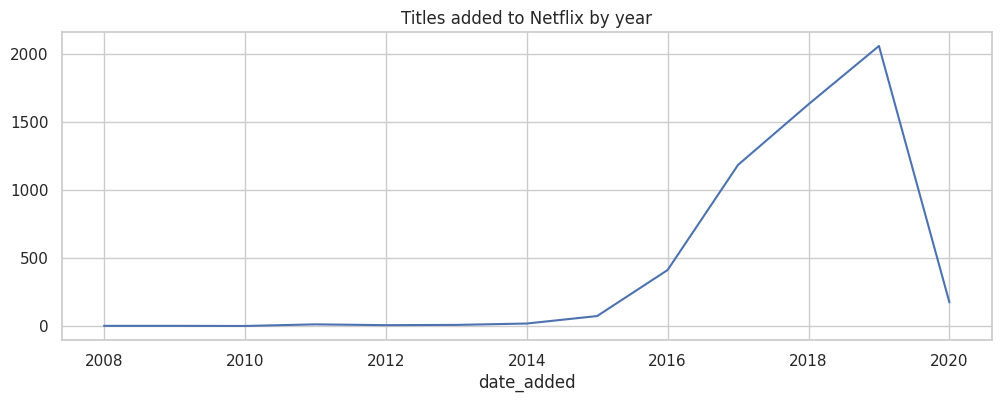

In [18]:
added_trend = df.dropna(subset=['date_added']).groupby(df['date_added'].dt.year).size()
added_trend.plot(figsize=(12,4))
plt.title('Titles added to Netflix by year')
plt.show()

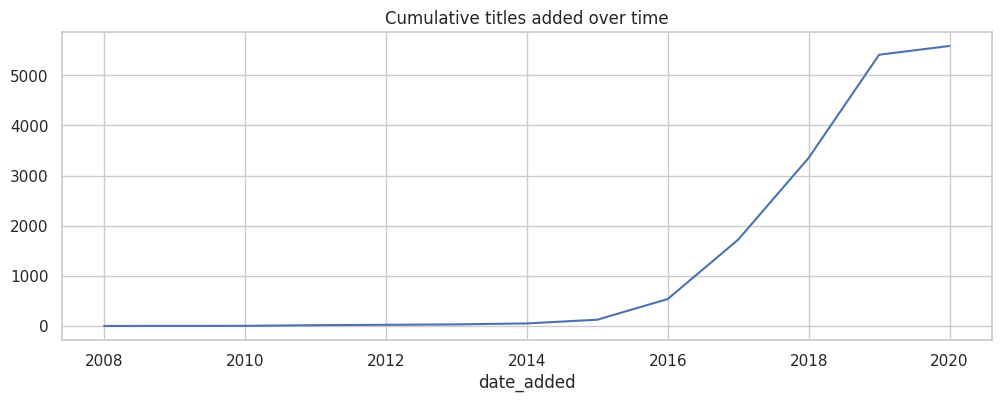

In [15]:
added_trend.cumsum().plot(figsize=(12,4))
plt.title('Cumulative titles added over time')
plt.show()

In [20]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.replace(r'\d+', '', regex=True).str.strip()

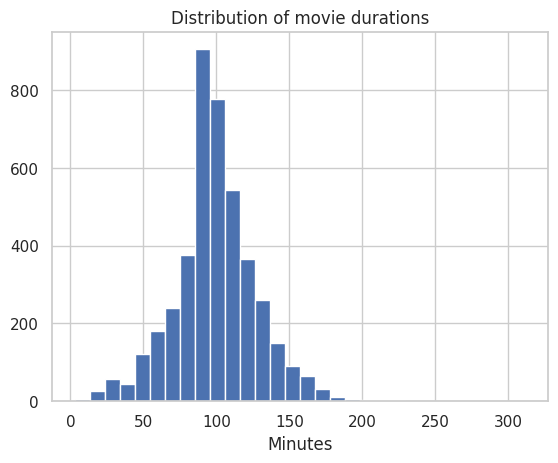

In [21]:
movies = df[df['type']=='Movie']
movies['duration_num'].dropna().hist(bins=30)
plt.xlabel('Minutes')
plt.title('Distribution of movie durations')
plt.show()

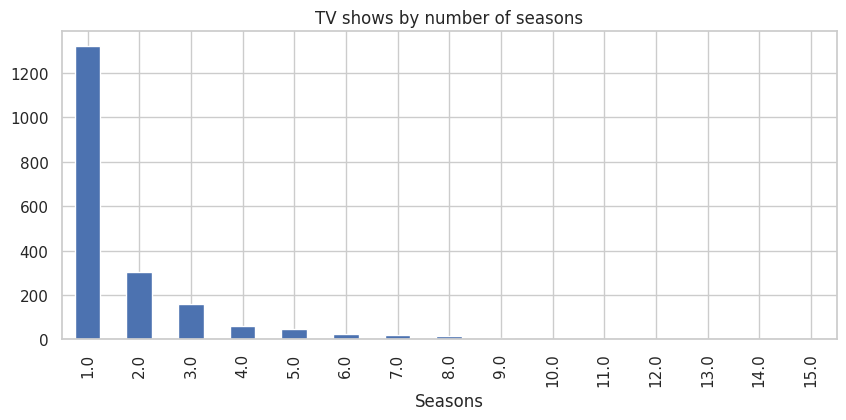

In [22]:
tv = df[df['type']=='TV Show']
tv['duration_num'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.xlabel('Seasons')
plt.title('TV shows by number of seasons')
plt.show()

In [23]:
df['genre_list'] = df['listed_in'].fillna('').apply(lambda s: [g.strip() for g in s.split(',')] if s else [])

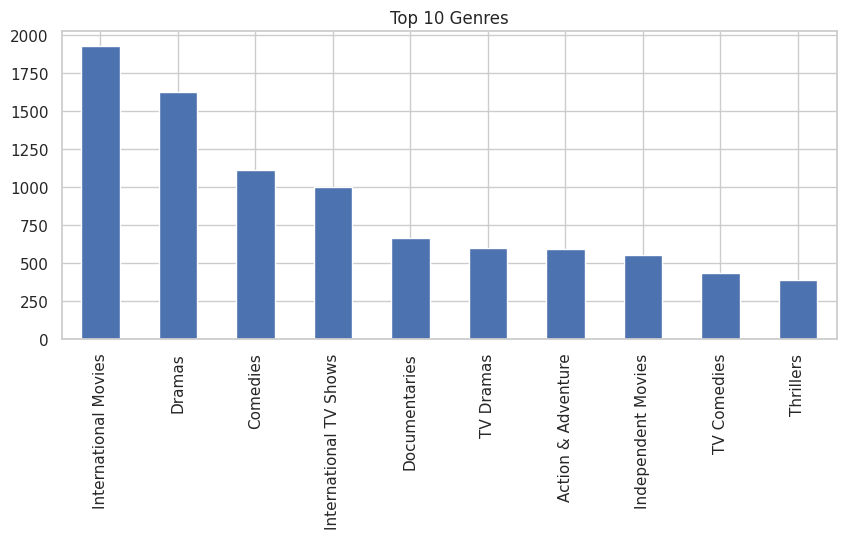

In [24]:
mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_, index=df.index)
genre_counts = genre_df.sum().sort_values(ascending=False).head(10)
genre_counts.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Genres')
plt.show()

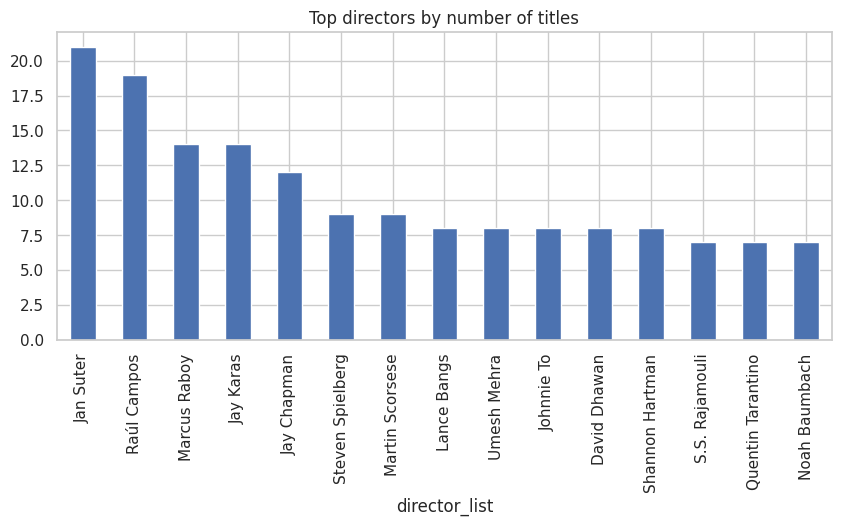

In [25]:
df['director_list'] = df['director'].fillna('').apply(lambda s: [d.strip() for d in s.split(',')] if s else [])
top_directors = df.explode('director_list')['director_list'].value_counts().head(15)
top_directors.plot(kind='bar', figsize=(10,4))
plt.title('Top directors by number of titles')
plt.show()

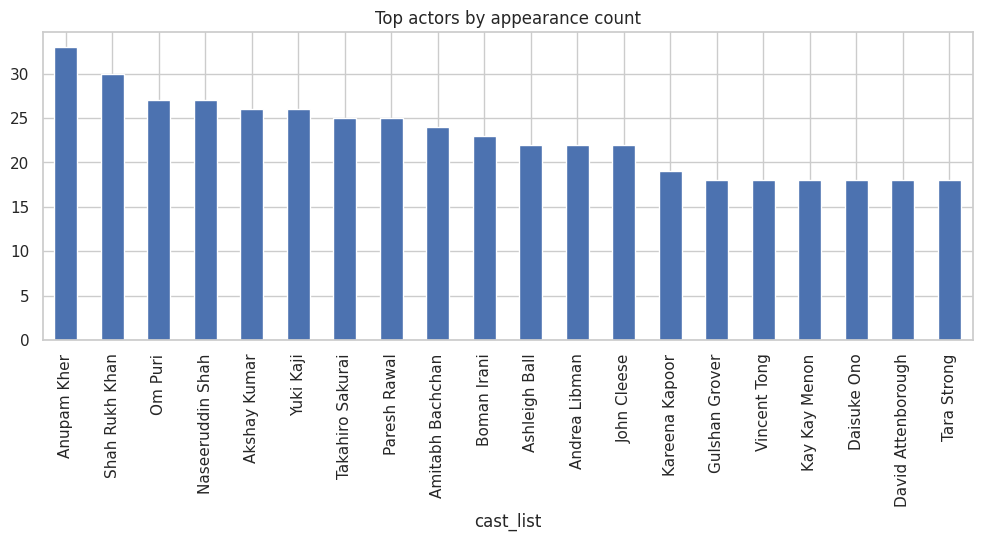

In [26]:
df['cast_list'] = df['cast'].fillna('').apply(lambda s: [c.strip() for c in s.split(',')] if s else [])
top_actors = df.explode('cast_list')['cast_list'].value_counts().head(20)
top_actors.plot(kind='bar', figsize=(12,4))
plt.title('Top actors by appearance count')
plt.show()

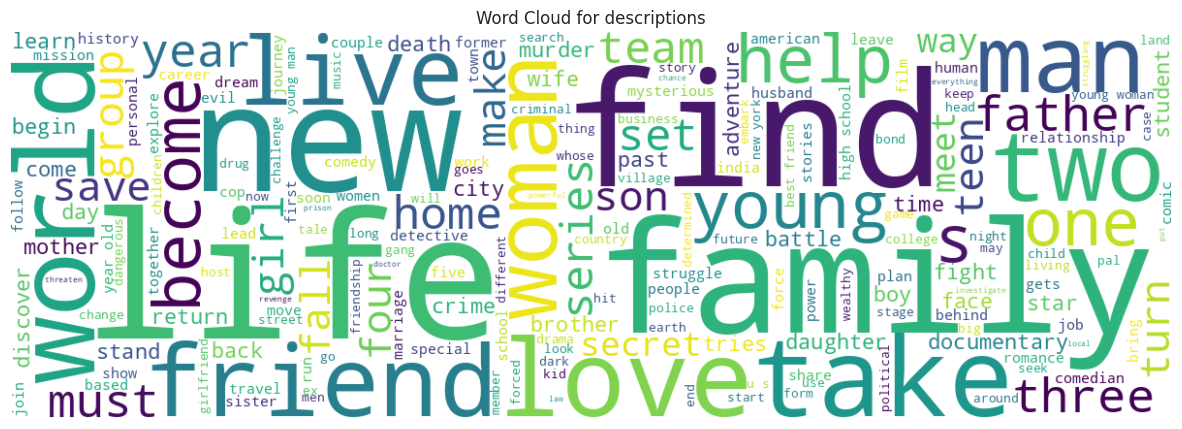

In [28]:
text = " ".join(df['description'].dropna().astype(str)).lower()
stopwords = set(STOPWORDS)
wc = WordCloud(width=1200, height=400, stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,6)); plt.imshow(wc, interpolation='bilinear'); plt.axis('off')
plt.title('Word Cloud for descriptions')
plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=50)
bag = cv.fit_transform(df['description'].dropna())
sum_words = bag.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq[:20]  # top 20 terms

[('life', np.int64(599)),
 ('young', np.int64(511)),
 ('new', np.int64(491)),
 ('family', np.int64(418)),
 ('world', np.int64(404)),
 ('man', np.int64(394)),
 ('love', np.int64(341)),
 ('woman', np.int64(331)),
 ('friends', np.int64(303)),
 ('series', np.int64(288)),
 ('documentary', np.int64(262)),
 ('school', np.int64(242)),
 ('father', np.int64(221)),
 ('old', np.int64(219)),
 ('finds', np.int64(218)),
 ('help', np.int64(216)),
 ('high', np.int64(208)),
 ('home', np.int64(199)),
 ('lives', np.int64(198)),
 ('years', np.int64(192))]

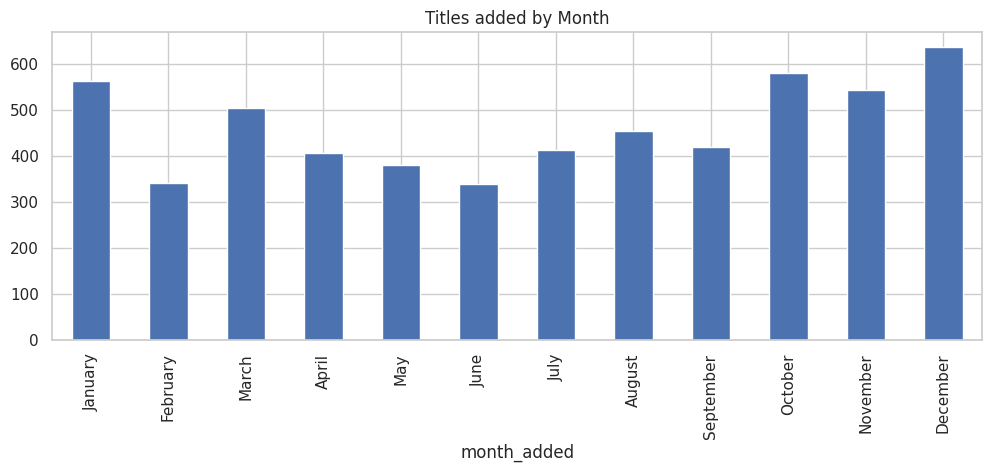

In [30]:
df['month_added'] = pd.Categorical(df['date_added'].dt.month_name(),
                                   categories=list(calendar.month_name[1:]), ordered=True)
month_counts = df['month_added'].value_counts().sort_index()
month_counts.plot(kind='bar', figsize=(12,4))
plt.title('Titles added by Month')
plt.show()

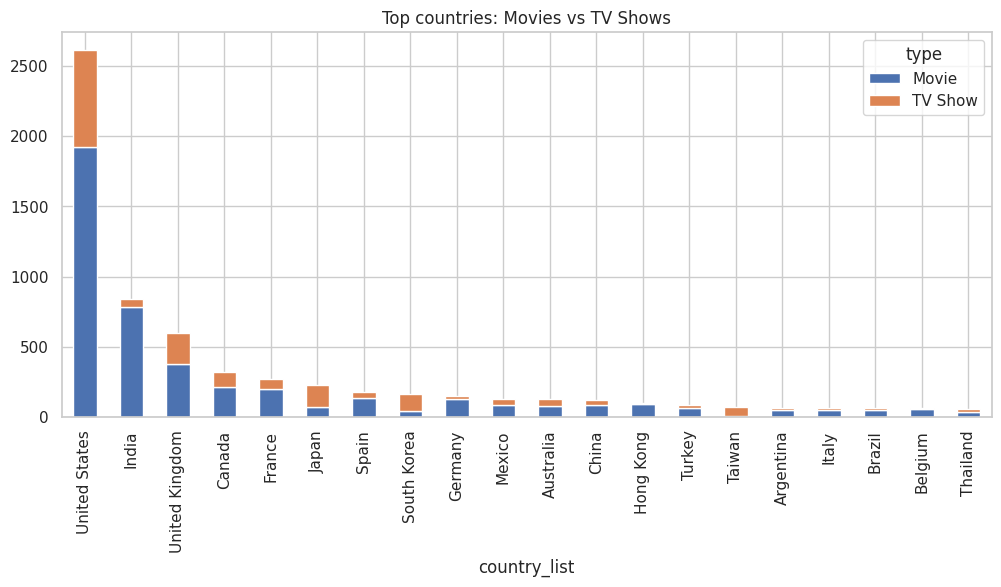

In [31]:
country_type = df.explode('country_list').pivot_table(index='country_list', columns='type', values='show_id', aggfunc='count', fill_value=0)
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(20)
country_type.loc[top_countries.index].plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Top countries: Movies vs TV Shows')
plt.show()

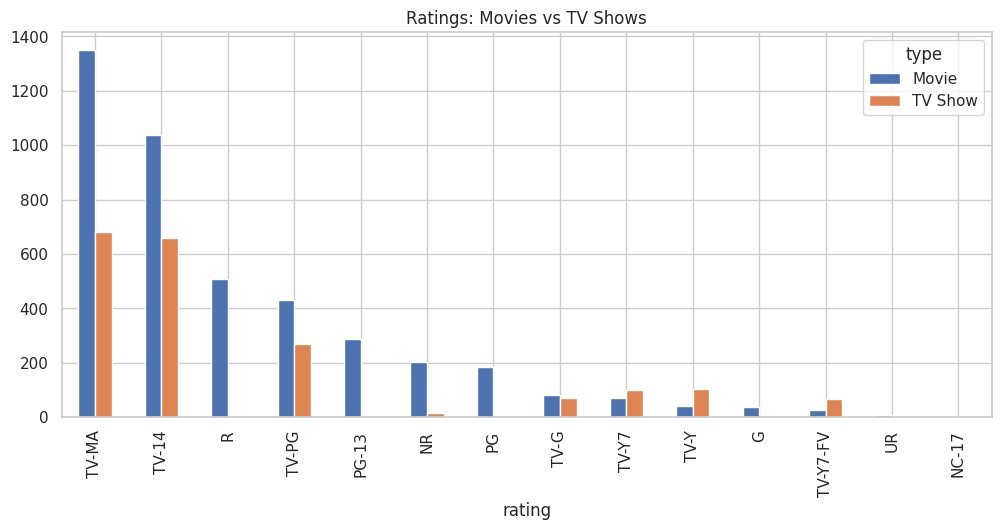

In [32]:
ratings_pivot = df.pivot_table(index='rating', columns='type', values='show_id', aggfunc='count', fill_value=0)
ratings_pivot.sort_values(by='Movie' if 'Movie' in ratings_pivot.columns else ratings_pivot.columns[0], ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Ratings: Movies vs TV Shows')
plt.show()

In [33]:
df.sort_values('release_year').head(10)[['title','type','release_year']]
df.sort_values('release_year', ascending=False).head(10)[['title','type','release_year']]

,title,type,release_year
3546,"Nisman: The Prosecutor, the President, and the...",TV Show,2020
3220,Dracula,TV Show,2020
3352,A Fall from Grace,Movie,2020
3189,Cheer,TV Show,2020
3353,Ares,TV Show,2020
3195,"Live Twice, Love Once",Movie,2020
3180,Bulletproof 2,Movie,2020
3325,"Sex, Explained",TV Show,2020
3426,Kipo and the Age of Wonderbeasts,TV Show,2020
3249,All the Freckles in the World,Movie,2020


In [34]:
df.sort_values('date_added', ascending=False).head(10)[['title','date_added','type']]

,title,date_added,type
3337,The Bling Ring,2020-01-18,Movie
3352,A Fall from Grace,2020-01-17,Movie
3353,Ares,2020-01-17,TV Show
3354,Nailed It! Germany,2020-01-17,TV Show
3361,Deadcon,2020-01-16,Movie
3363,Handsome Siblings,2020-01-16,TV Show
3364,Hop,2020-01-16,Movie
3365,Jezebel,2020-01-16,Movie
3366,Legend,2020-01-16,Movie
3367,NiNoKuni,2020-01-16,Movie


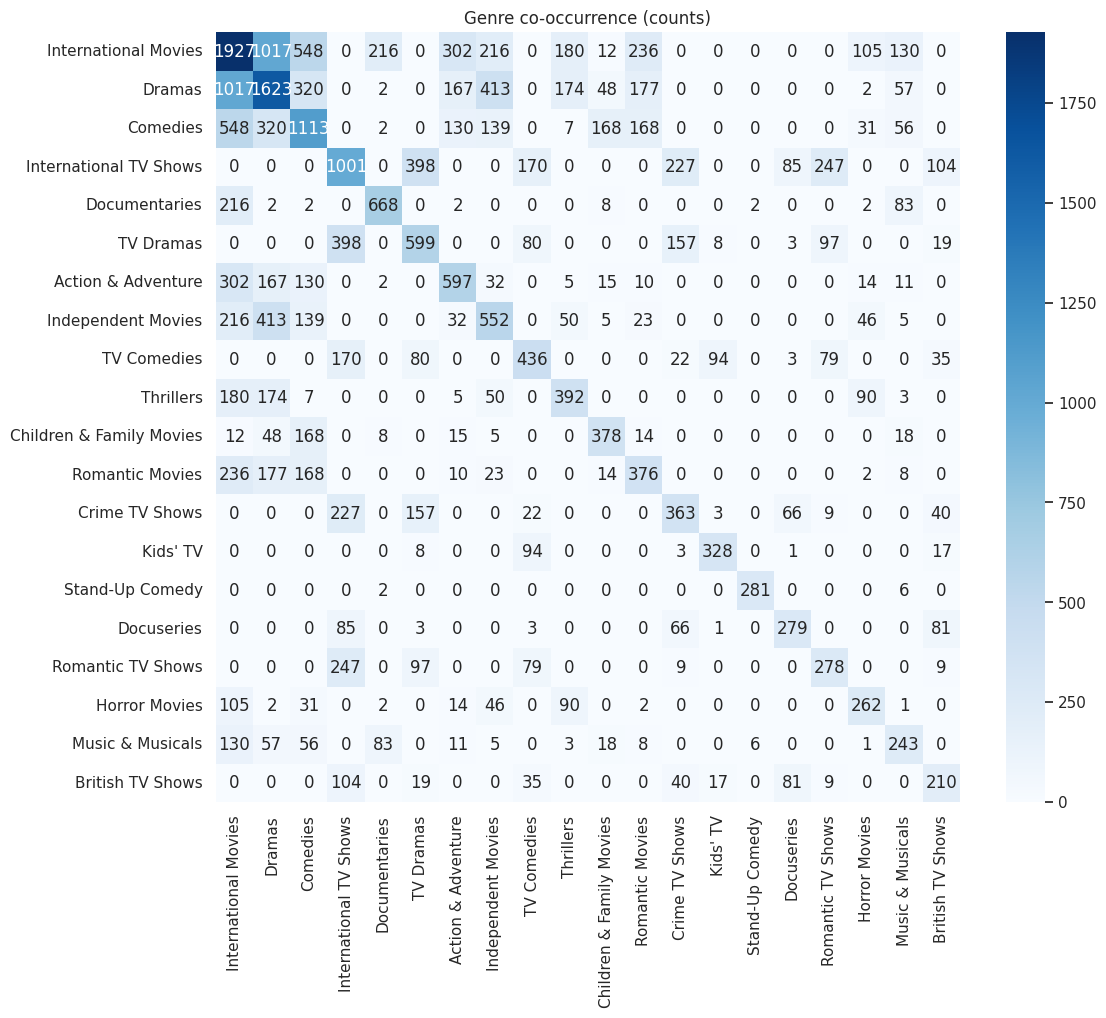

In [35]:
top_genres = genre_df.sum().sort_values(ascending=False).head(20).index
co_occ = genre_df[top_genres].T.dot(genre_df[top_genres])   # co-occurrence counts
plt.figure(figsize=(12,10))
sns.heatmap(co_occ, annot=True, fmt='g', cmap='Blues')
plt.title('Genre co-occurrence (counts)')
plt.show()